# Week 5

This week, we made significant improvements and experiments with our predictive models. Our work focused on enhancing the performance of both regression and classification base models, and then leveraging these optimizations in ensemble approaches. Below is an overview of our work and the results obtained.

---

## 1. Improving Base Models

### 1.1 Linear Regression Improvements

- **Enhancement**: We evaluated the quadratic fit for every feature against the predictor. By creating new columns that contained the square of each feature, we were able to capture non-linear relationships better.
- **Performance Gains**:
  - **Old Champion Model**:
    - **MSE**: 0.021026804083705247  
    - **R²**: 0.6478343921287386
  - **New Champion Model**:
    - **MSE**: 0.01971761590591921  
    - **R²**: 0.6697612169858351

These improvements indicate that incorporating quadratic terms has helped the model better capture the underlying patterns in the data.
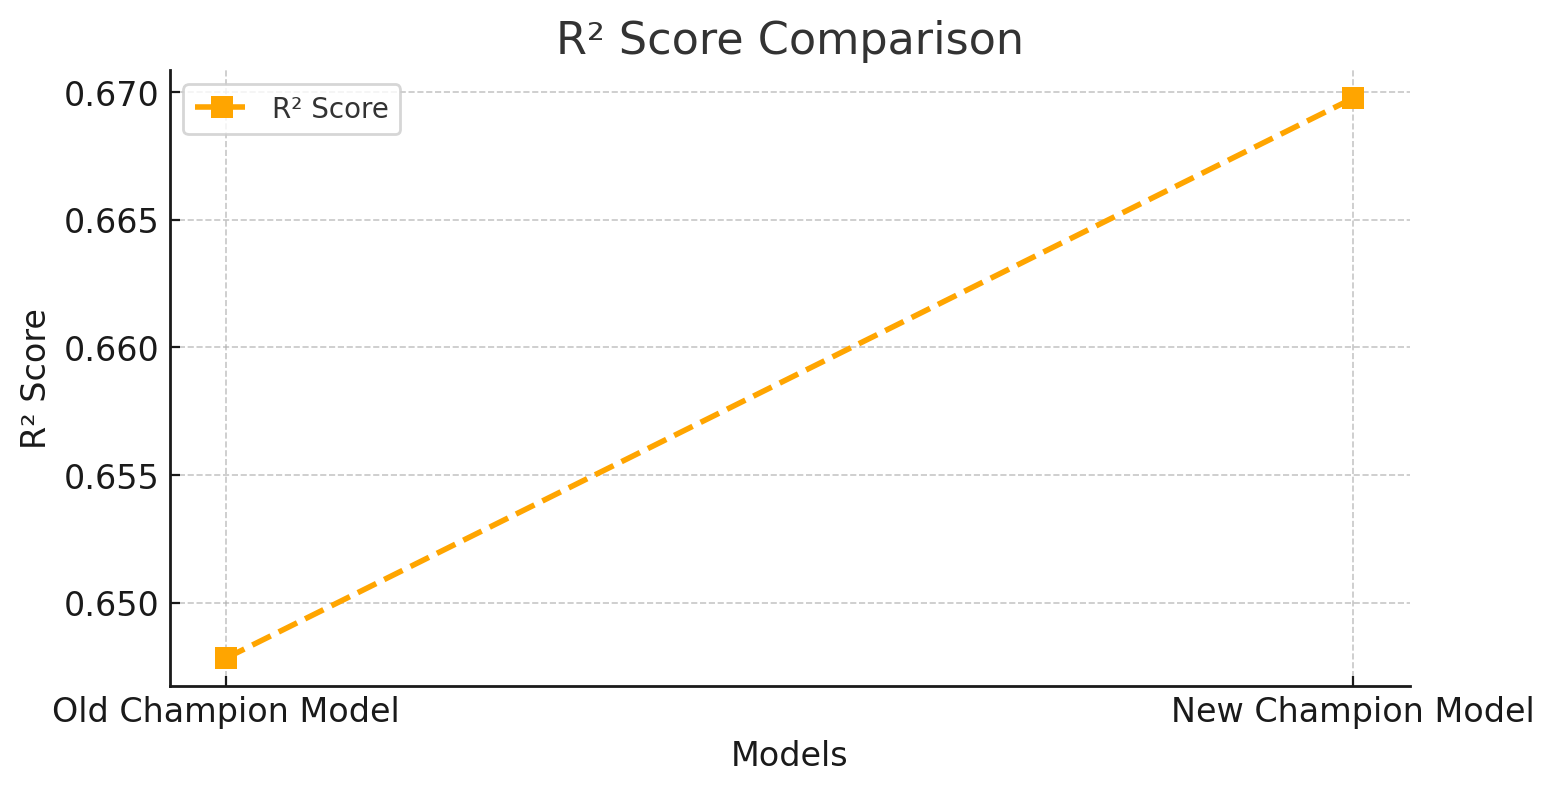
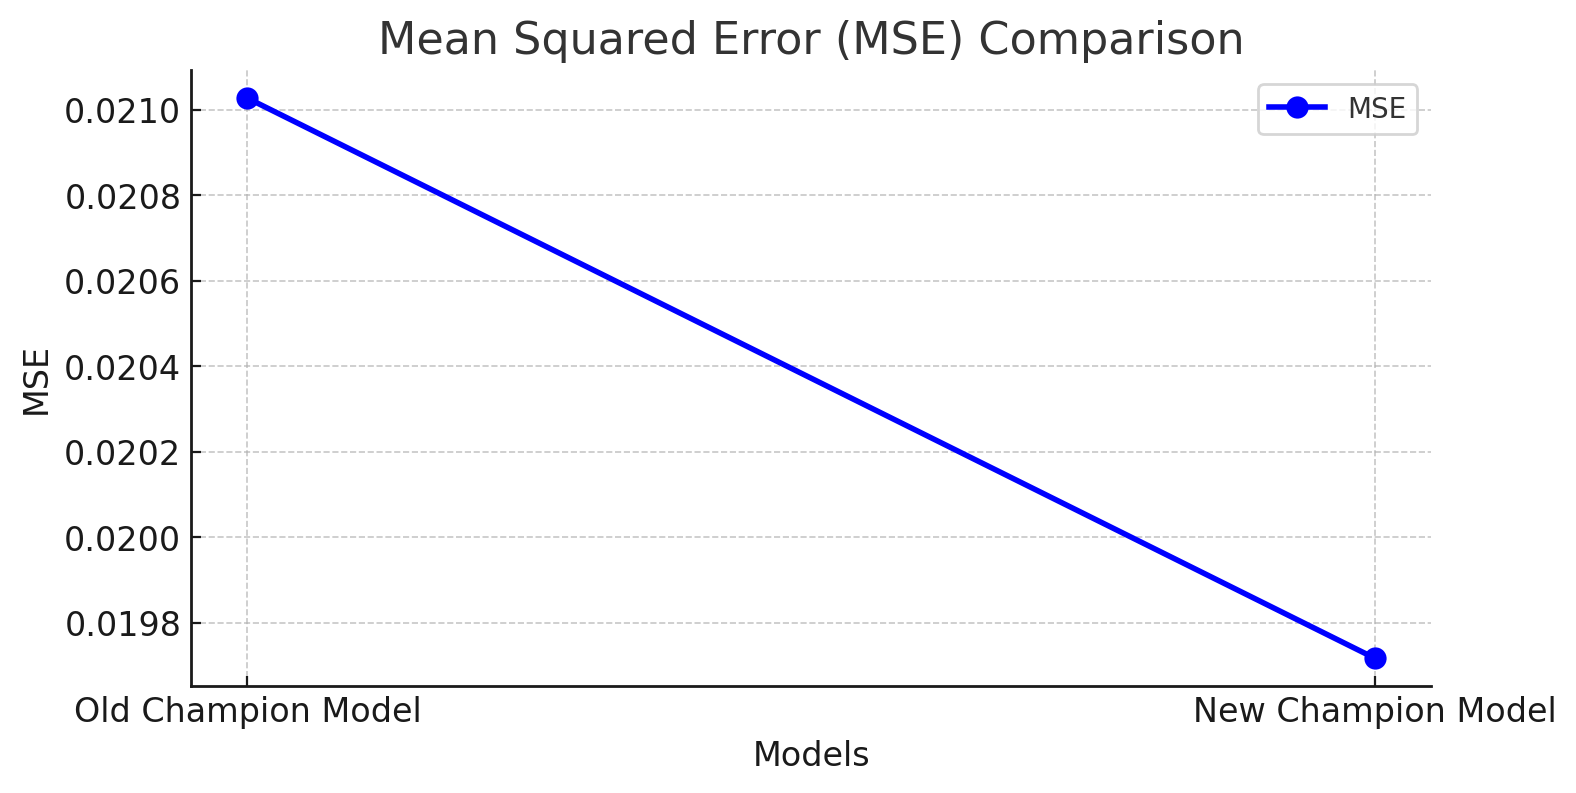
---

### 1.2 Logistic Regression Improvements

- **Enhancement**: We addressed class imbalance by oversampling underrepresented classes. This was achieved by duplicating (with replacement) instances in the training data so that each class had an equal number of samples.
- **Performance Gains**:
  - **Old Champion Model**:
    - **CV Mean Accuracy**: 0.6229116945107399  
    - **Error Rate**: 0.3770883054892601  
    - **Weighted Precision**: 0.6098597960806662  
    - **Weighted Recall**: 0.6229116945107399  
    - **Weighted F1**: 0.6126521143872541
  - **New Champion Model**:
    - **CV Mean Accuracy**: 0.7439072403595385  
    - **CV Std Accuracy**: 0.012574619420463161  
    - **Test Accuracy**: 0.7454648526077098  
    - **Error Rate**: 0.2545351473922902  
    - **Weighted Precision**: 0.7382418704092023  
    - **Weighted Recall**: 0.7454648526077098  
    - **Weighted F1**: 0.7398947699457381
    
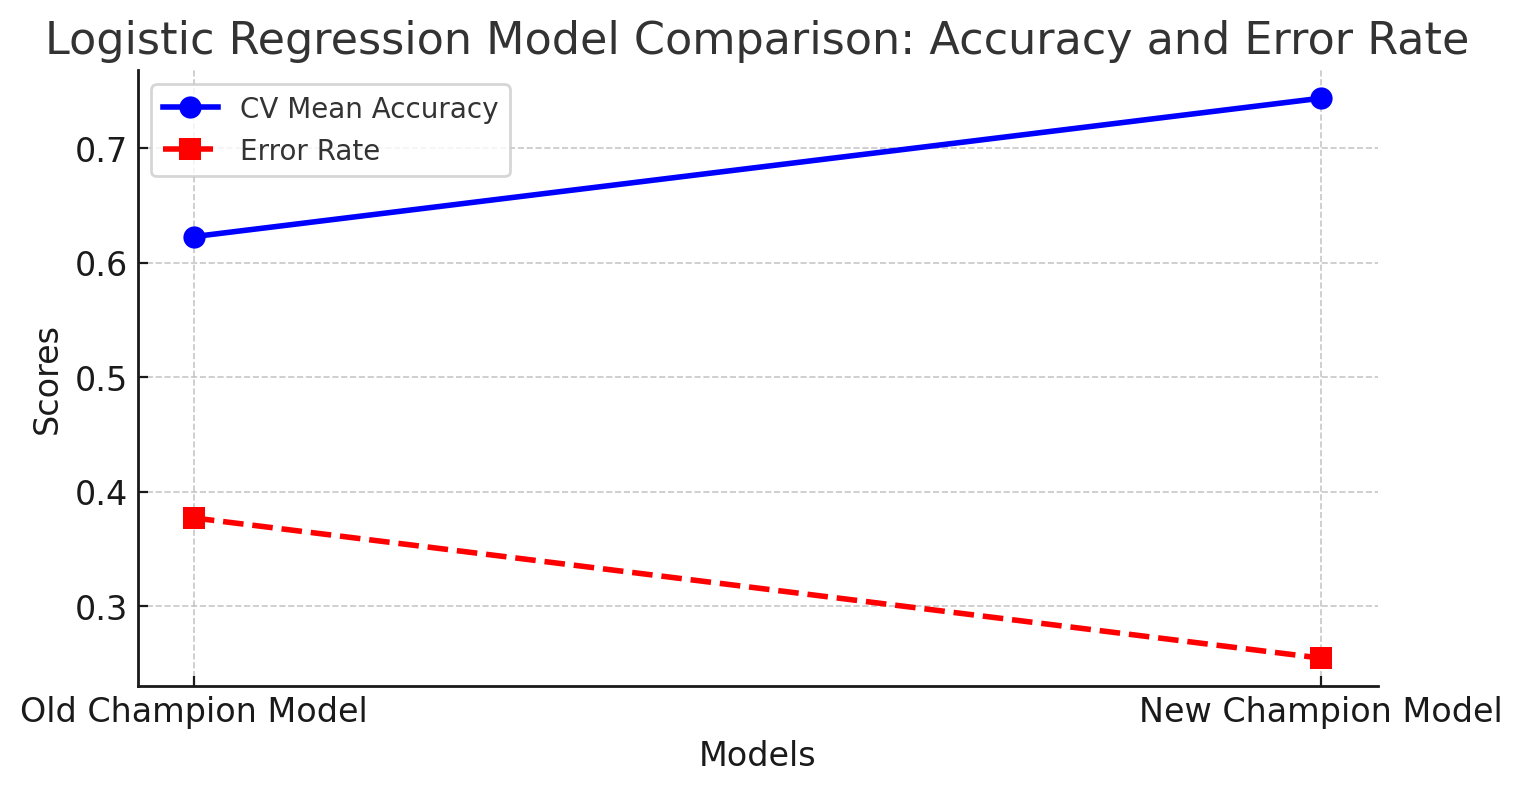
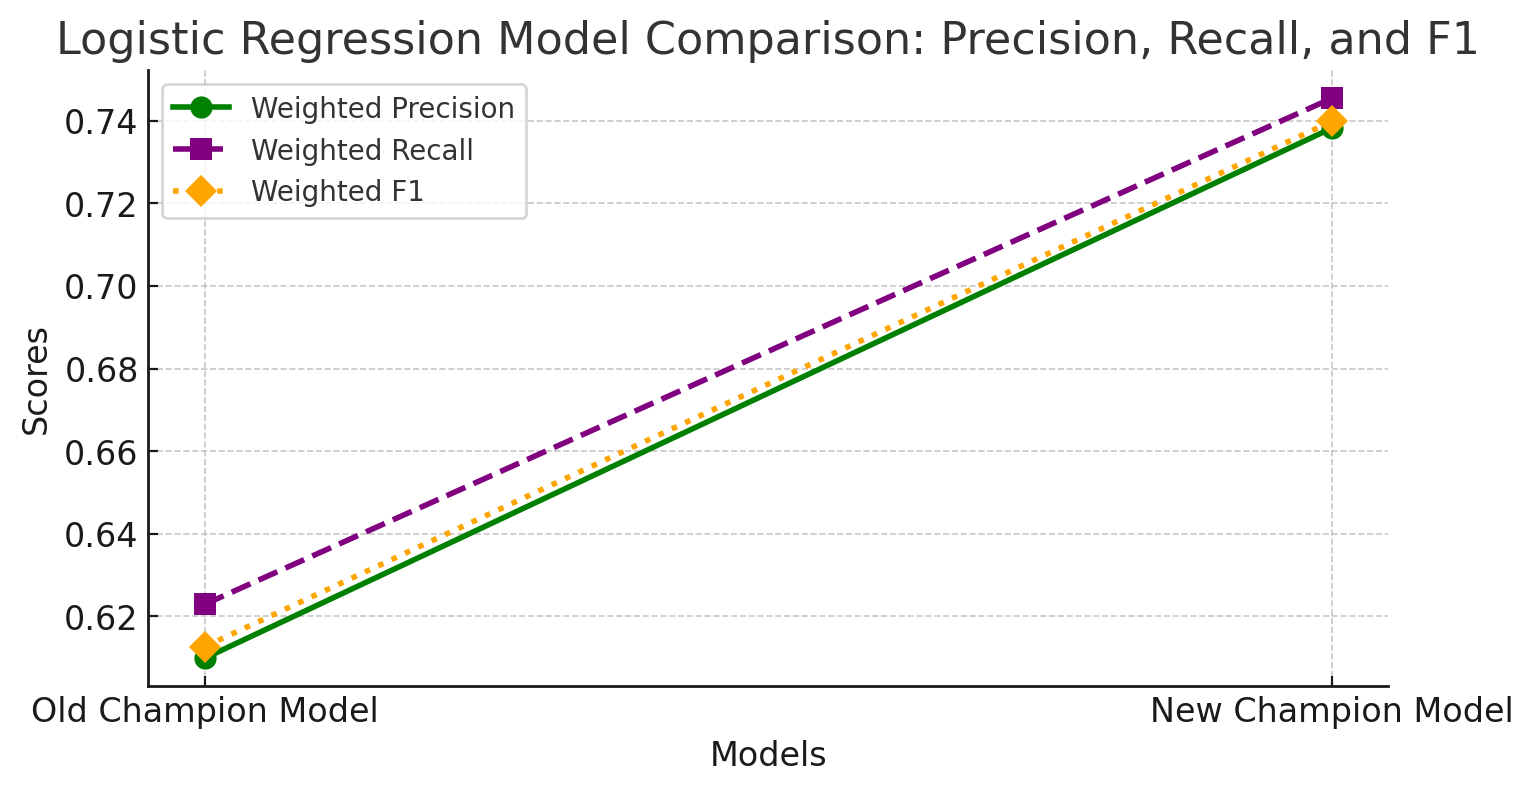


**Interpretation**:  
The cross-validation mean accuracy and its standard deviation give us insight into the model's generalization ability and consistency across different subsets of the data. A higher CV mean accuracy and a low standard deviation, as seen in the new champion model, suggest that the model is both more accurate and more stable.

---

## 2. Ensemble Experiments

After refining our base models, we carried forward these optimizations into ensemble methods for both regression and classification tasks. Ensembles, by combining predictions from multiple models, have yielded improved performance metrics.

### 2.1 Ensemble for Regression

- **Results**:
  - **MSE**: 0.015343821623814  
  - **R²**: 0.7430153318731797
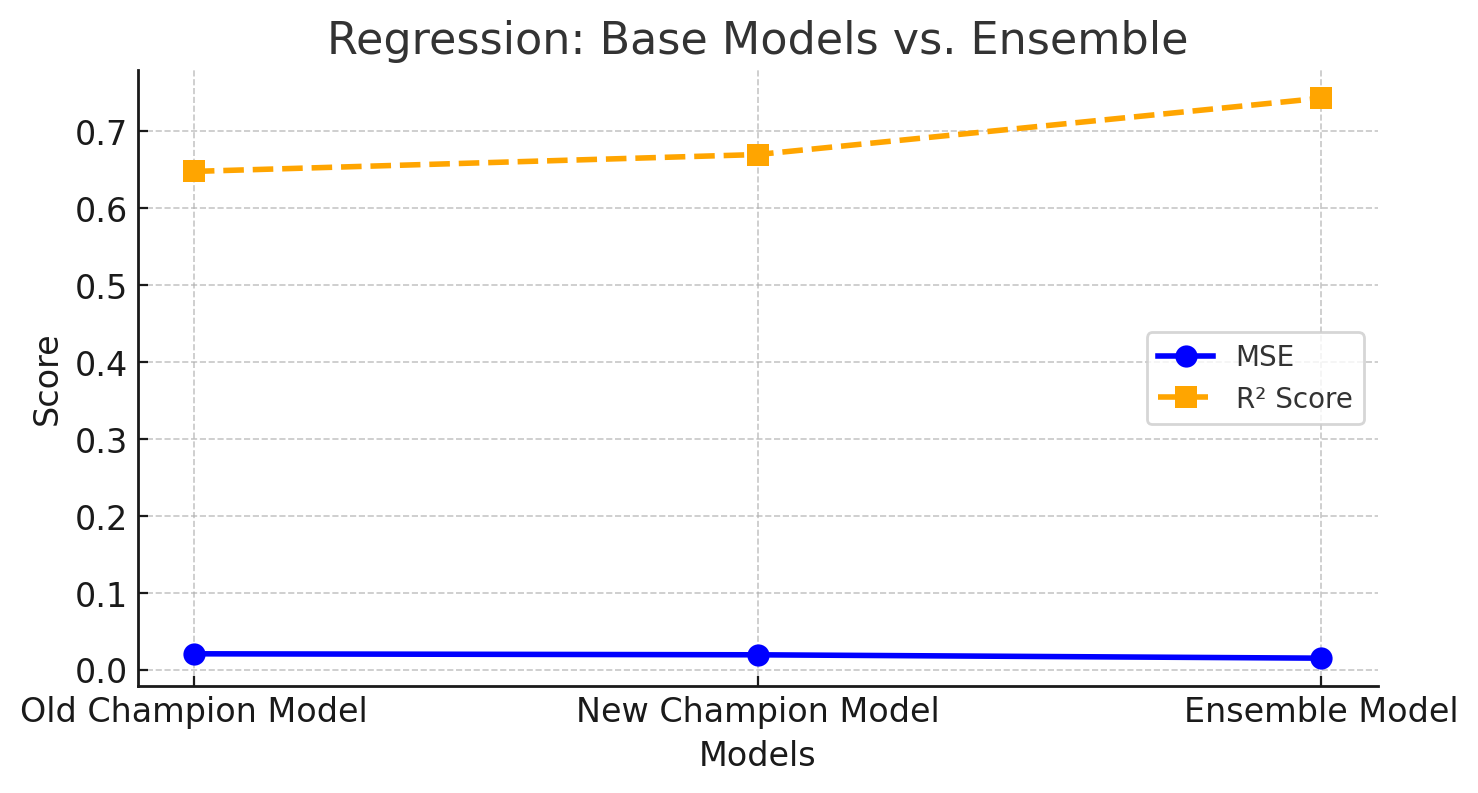

The ensemble approach for regression outperforms our base linear regression model, demonstrating that combining multiple models can capture more complex patterns.

### 2.2 Ensemble for Classification

- **Voting Ensemble**:
  - **CV Mean Accuracy**: 0.8110825906525619  
  - **CV Std Accuracy**: 0.0038536070571316915  
  - **Test Accuracy**: 0.822562358276644
- **Stacking Ensemble**:
  - **CV Mean Accuracy**: 0.920493170816912  
  - **CV Std Accuracy**: 0.006744640746967249  
  - **Test Accuracy**: 0.9280045351473923
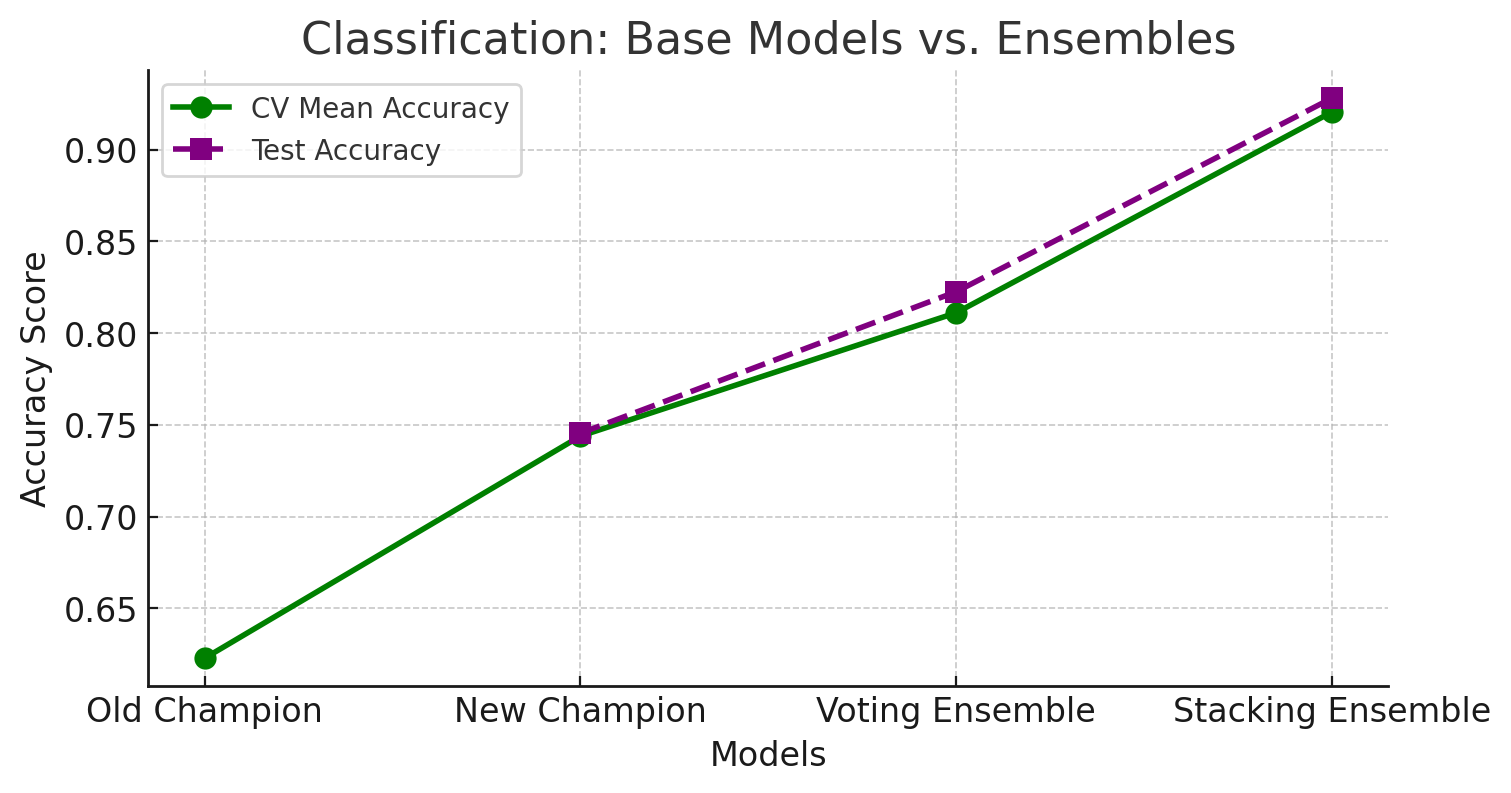

**Observation**:  
Both ensemble methods have significantly improved classification performance compared to individual models. The stacking ensemble, in particular, shows outstanding accuracy and stability as indicated by its high CV mean accuracy and low standard deviation.

---

## 3. Ensemble 

### 3.1 Classifier Ensemble

**Models Used**:
- **KNeighborsClassifier**: A non-parametric method that classifies data based on the nearest neighbors.
- **LogisticRegression**: A probabilistic model that uses a logistic function to model binary or multiclass outcomes.

**Ensemble Strategies**:
- **VotingClassifier**:
  - **Method**: Hard voting.
  - **How It Works**: Each base classifier (KNN and Logistic Regression) casts a vote for the class label. The final prediction is determined by the majority vote.
- **StackingClassifier**:
  - **Base Models**: KNN and Logistic Regression (as defined in separate pipelines with scaling).
  - **Meta-Learner**: Logistic Regression is used as the final estimator.
  - **Mechanism**: The predictions from the base models are used as inputs to the meta-learner, which then makes the final prediction. Cross-validation (with 5 folds) is used to train the meta-learner reliably.

### 3.2 Regression Ensemble

**Preprocessing Pipeline**:
- **Custom Transformations**:
  - **Feature Squaring**: Certain features are squared to capture non-linear relationships.
  - **Combine Symmetrical Features**: Correlated symmetrical features are combined to reduce redundancy.
- **Column Transformation**: Irrelevant columns are dropped.
- **Normalization**: StandardScaler is used to normalize the features.

**Base Models**:
- **BaggingRegressor with LinearRegression**: Uses bootstrapping to create multiple training sets for a more robust linear model.
- **BaggingRegressor with DecisionTreeRegressor**: Uses ensemble of decision trees trained on bootstrapped samples.
- **RandomForestRegressor**: An ensemble of decision trees using random feature subsets.

**Ensemble Strategy**:
- **StackingRegressor**:
  - **Base Estimators**: The above three regressors.
  - **Meta-Learner**: LinearRegression combines the predictions of the base models.
  - **Cross-Validation**: 5-fold cross-validation is used to train the meta-learner.
  - **Passthrough Option**: The original features are also passed along with the base models' predictions, providing additional information for the final prediction.

---

## Summary

This week’s efforts have resulted in:

- **Enhanced Base Models**:
  - Improved linear regression by incorporating quadratic features.
  - Boosted logistic regression performance by balancing class representation through oversampling.
- **Effective Ensemble Methods**:
  - Ensembles for both regression and classification have outperformed individual base models.
  - The stacking ensemble, in particular, has shown superior performance, thanks to its meta-learning approach that optimally combines base model predictions.
- **Robust Model Evaluation**:
  - Cross-validation metrics (mean and standard deviation) provide confidence in the models' stability and generalization ability across different data splits.

These advancements highlight the importance of data preprocessing, model optimization, and ensemble methods in building robust predictive models.

---



# Sofware Development - CI/CD Deployment Report

## Project Overview

This report documents our implementation of a deployment pipeline for an ML-powered application with three main components:
- Machine learning models tracked with MLflow
- FastAPI backend API
- React frontend

## Initial CI/CD Plan

Our initial plan was to implement a full GitHub Actions CI/CD pipeline with:
- Automated quality checks for all components
- Continuous deployment to our Ubuntu server
- Full integration with GitHub for version control

## VPN Challenge & Solution

### Challenge
During implementation, we encountered a network constraint: our deployment server is only accessible through a VPN, which GitHub Actions runners cannot access. This blocked the standard CI/CD approach where GitHub would deploy directly to the server.

### Interim Solution
We adopted a hybrid approach:
1. **Automated Testing**: GitHub Actions run quality checks on all components automatically
2. **Manual Deployment**: We created a deployment script that efficiently packages and deploys all components
3. **Zip-based Deployment**: Components are packaged into a single ZIP file, transferred through the VPN, and deployed using the script

## Current Deployment Architecture

### Server Configuration
- **Web Server**: Nginx for serving frontend and routing backend requests
- **API Backend**: FastAPI application running as a systemd service
- **ML Tracking**: MLflow tracking server with SQLite backend and basic authentication
- **Frontend**: React application with API endpoints configured for production

### Deployment Flow
1. GitHub Actions run tests on all components
2. Code is packaged into a ZIP file
3. The ZIP is manually transferred to the server via VPN
4. A deployment script handles unpacking and service configuration

### Authentication & Security
- MLflow UI is secured with HTTP Basic Authentication
- All services run with appropriate Linux permissions
- System services automatically restart on failure

## Future Improvements

When network infrastructure allows, we plan to enhance our CI/CD pipeline:

### Option 1: Self-hosted Runner
Deploy a GitHub Actions runner inside our VPN to enable fully automated deployments.

### Option 2: Webhook-based Deployment
Set up a secure webhook endpoint on our server that GitHub can trigger after successful builds.

### Option 3: Artifact-based Deployment
Configure GitHub Actions to build and upload artifacts to a secure storage service that our server can access.

### We are probably going to use OPTION 2

## Lessons Learned

1. **Infrastructure Constraints Matter**: Network and security configurations can significantly impact CI/CD design.
2. **Deployment Scripts are Valuable**: Having robust deployment scripts provides flexibility regardless of the triggering mechanism.
3. **Environment Configurations**: Managing environment-specific configurations (like API URLs) requires careful planning.
4. **Authentication Planning**: Security considerations should be integrated from the beginning of deployment setup.

## Configuration Reference

Our deployment uses the following key configurations:

### MLflow Service
```ini
[Unit]
Description=MLflow Tracking Server
After=network.target

[Service]
User=www-data
WorkingDirectory=/opt/ml/mlflow
ExecStart=/usr/bin/python3 -m mlflow server \
    --backend-store-uri sqlite:///mlflow.db \
    --default-artifact-root ./mlruns \
    --host 127.0.0.1 \
    --port 5000

Restart=always

[Install]
WantedBy=multi-user.target
```

### API Service
```ini
[Unit]
Description=FastAPI Backend Service
After=network.target

[Service]
User=www-data
WorkingDirectory=/opt/fastapi-backend
ExecStart=/usr/bin/python3 -m uvicorn app.main:app --host 0.0.0.0 --port 8000
Restart=on-failure

[Install]
WantedBy=multi-user.target
```

### Nginx Configuration
```nginx
server {
    listen 80;
    server_name _;

    # Frontend
    location / {
        root /var/www/react-app;
        try_files $uri $uri/ /index.html;
    }

    # Backend API
    location /api {
        proxy_pass http://localhost:8000;
        proxy_http_version 1.1;
        proxy_set_header Host $host;
    }

    # MLflow UI
    location /mlflow/ {
        auth_basic "MLflow Authentication Required";
        auth_basic_user_file /etc/nginx/.htpasswd;
        proxy_pass http://127.0.0.1:5000/;
        proxy_set_header Host $host;
    }
}
```

## Connecting to Remote MLflow

For local development connecting to the remote MLflow:

```python
import os
import mlflow

# Set the tracking URI and auth
os.environ["MLFLOW_TRACKING_URI"] = "http://194.47.177.128/mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "admin_password"

# Use MLflow as normal
mlflow.set_experiment("my-experiment")
```

This setup ensures we maintain proper ML experiment tracking while development continues.